## Batteries analysis

In [38]:
from scipy.io import loadmat
import numpy
import matplotlib.pyplot as plt
import pathlib as path
import pandas as pd
import datetime as dt

In [2]:
DATA = path.Path('/home/jovyan/work/data/nasa/batteries/')
rw9 = loadmat(DATA/'RW9.mat')
# rw10 = loadmat(DATA/'RW10.mat')
#w11 = loadmat(DATA/'RW11.mat')
#w12 = loadmat(DATA/'RW12.mat')


In [3]:
mdata = rw9['data']  # variable in mat file 
ndata = {n: mdata[n][0,0] for n in mdata.dtype.names}
# Three columns: procedure - name, description and step: measurement data
columns = [n for n, v in ndata.items() if v.size == 1] # single out procedure and description
description =dict((c, ndata[c][0]) for c in columns )
display(description)


{'procedure': 'Uniform random walk charge and discharge at room temperature',
 'description': 'Experiment consisting of repeated iteration of a randomized series of charging and discharging pulses followed by a full recharge to 4.2V. Batteries are charged and discharged at room temperature'}

In [4]:
# Now in step we have array of NP arrays, let's look at it
# Unique comments
display(len(ndata['step'][0]))
comments = set([(n[1][0],n[0][0]) for n in ndata['step'][0]])
display(comments)
# step data look
steps =[(n[1][0],n[7][0])  for n in ndata['step'][0] ]
steps[1000:1010]

113578

{('C', 'charge (random walk)'),
 ('C', 'pulsed charge (charge)'),
 ('C', 'reference charge'),
 ('D', 'discharge (random walk)'),
 ('D', 'low current discharge at 0.04A'),
 ('D', 'pulsed load (discharge)'),
 ('D', 'reference discharge'),
 ('R', 'pulsed charge (rest)'),
 ('R', 'pulsed load (rest)'),
 ('R', 'rest (random walk)'),
 ('R', 'rest post low current discharge'),
 ('R', 'rest post pulsed load or charge'),
 ('R', 'rest post reference charge'),
 ('R', 'rest post reference discharge'),
 ('R', 'rest prior low current discharge')}

[('R', '08-Jan-2014 18:46:53'),
 ('C', '08-Jan-2014 18:46:54'),
 ('R', '08-Jan-2014 18:51:53'),
 ('C', '08-Jan-2014 18:51:53'),
 ('R', '08-Jan-2014 18:56:53'),
 ('D', '08-Jan-2014 18:56:55'),
 ('R', '08-Jan-2014 19:01:55'),
 ('D', '08-Jan-2014 19:01:55'),
 ('R', '08-Jan-2014 19:06:55'),
 ('C', '08-Jan-2014 19:06:57')]

In [5]:
# convert time to python
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac
# Nevermind, wrong direction
# step_time = [(n[1][0], list(map(matlab2datetime,  n[2][0])) )  for n in ndata['step'][0] ]


In [42]:
step_data = ndata['step'][0]
comment = [n[0][0]  for n in step_data ]
time = [n[2][0]  for n in step_data]
voltage = [n[4][0]  for n in step_data]
current = [n[5][0]  for n in step_data]
temperature = [n[6][0]  for n in step_data ]
step_dict = {"step": comment, "time": time, "voltage": voltage, "current": current, "temperature": temperature  }

# Now finally to pandas
df = pd.DataFrame.from_dict(step_dict)
display(df)

,step,time,voltage,current,temperature
0,reference charge,"[5.04, 15.04, 25.04, 35.04, 45.04, 55.04, 65.0...","[3.838, 3.865, 3.878, 3.888, 3.895, 3.9, 3.905...","[-2.007, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -...","[24.3853, 24.3853, 24.29163, 24.2448, 24.26041..."
1,reference discharge,"[10509.699999999999, 10519.7, 10529.7, 10539.6...","[4.113, 4.099, 4.091, 4.085, 4.079, 4.075, 4.0...","[1.004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[22.10602, 22.05919, 22.04357, 22.01235, 21.98..."
2,reference charge,"[18062.29, 18072.29, 18082.29, 18092.29, 18102...","[3.492, 3.601, 3.651, 3.69, 3.723, 3.751, 3.77...","[-2.01, -2.0, -2.0, -2.0, -2.001, -2.0, -2.0, ...","[27.49199, 27.5076, 27.5076, 27.47638, 27.4451..."
3,reference discharge,"[28575.879999999997, 28585.88, 28595.88, 28605...","[4.113, 4.099, 4.091, 4.085, 4.079, 4.074, 4.0...","[1.003, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[22.55875, 22.55875, 22.57436, 22.60559, 22.60..."
4,pulsed load (rest),"[46858.079999999994, 46859.079999999994, 46860...","[4.199, 4.199, 4.199, 4.199, 4.199, 4.199, 4.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[22.99587, 22.98026, 22.98026, 22.98026, 22.98..."
...,...,...,...,...,...
113573,rest post reference discharge,"[12675446.09, 12675456.09, 12675466.09, 126754...","[3.328, 3.482, 3.522, 3.551, 3.573, 3.59, 3.60...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[38.29132, 38.27586, 38.24494, 38.22948, 38.21..."
113574,reference charge,"[12682646.12, 12682656.120000001, 12682666.12,...","[4.096, 4.181, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4...","[-2.0, -2.0, -1.938, -1.794, -1.68, -1.588, -1...","[32.10779, 32.13871, 32.18508, 32.24692, 32.30..."
113575,rest post reference charge,"[12703178.8, 12703188.8, 12703198.8, 12703208....","[4.198, 4.198, 4.197, 4.197, 4.197, 4.197, 4.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[32.40151, 32.40151, 32.40151, 32.40151, 32.41..."
113576,reference discharge,"[12703478.83, 12703488.83, 12703498.83, 127035...","[4.055, 3.995, 3.976, 3.961, 3.948, 3.937, 3.9...","[1.005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[32.46334, 32.49426, 32.52518, 32.5561, 32.602..."


In [43]:
df.groupby('step').count()

,time,voltage,current,temperature
step,,,,
charge (random walk),28119,28119,28119,28119
discharge (random walk),28221,28221,28221,28221
low current discharge at 0.04A,2,2,2,2
pulsed charge (charge),114,114,114,114
pulsed charge (rest),114,114,114,114
pulsed load (discharge),184,184,184,184
pulsed load (rest),184,184,184,184
reference charge,80,80,80,80
reference discharge,80,80,80,80


In [44]:
# Throw away everything except reference discharge (for capacity measurement)
df = df[df['step']=='reference discharge']
df.head()

,step,time,voltage,current,temperature
1,reference discharge,"[10509.699999999999, 10519.7, 10529.7, 10539.6...","[4.113, 4.099, 4.091, 4.085, 4.079, 4.075, 4.0...","[1.004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[22.10602, 22.05919, 22.04357, 22.01235, 21.98..."
3,reference discharge,"[28575.879999999997, 28585.88, 28595.88, 28605...","[4.113, 4.099, 4.091, 4.085, 4.079, 4.074, 4.0...","[1.003, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[22.55875, 22.55875, 22.57436, 22.60559, 22.60..."
3031,reference discharge,"[427288.81999999995, 427298.82, 427308.82, 427...","[4.11, 4.094, 4.085, 4.077, 4.071, 4.066, 4.06...","[1.005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.001, 1.0, 1...","[22.63681, 22.63681, 22.65242, 22.66803, 22.68..."
3033,reference discharge,"[446909.27, 446919.26999999996, 446929.27, 446...","[4.109, 4.093, 4.084, 4.076, 4.07, 4.065, 4.06...","[1.006, 0.999, 0.999, 1.0, 1.0, 1.0, 1.001, 1....","[22.15285, 22.16847, 22.18408, 22.2153, 22.230..."
6057,reference discharge,"[830934.71, 830944.71, 830954.7100000001, 8309...","[4.106, 4.088, 4.078, 4.071, 4.064, 4.058, 4.0...","[1.005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[21.73134, 21.73134, 21.76257, 21.77818, 21.79..."


In [45]:
# Only time and current
df = df.drop(columns=['step', 'voltage', 'temperature'])
df.insert(2, 'capacity', 0) 

In [46]:
# Find a total power in Ah which battery produced during discharge
def integrate_current(df):
    return numpy.trapz(df['current'], df['time']) / 3600 # Using trapezoidal integration like in document, 3600 is sec to hour

In [47]:
# Now calculate capacity
df["capacity"] = df.apply(integrate_current, axis=1)
display(df['capacity'])
# use only middle time point, in hours
df["time"] = df.apply(lambda df: df['time'][len(df['time'])//2]/3600, axis=1)

1         2.097739
3         2.094665
3031      2.044567
3033      2.040850
6057      1.980208
            ...   
107540    0.784926
110551    0.759760
110555    0.758723
113572    0.748762
113576    0.750185
Name: capacity, Length: 80, dtype: float64

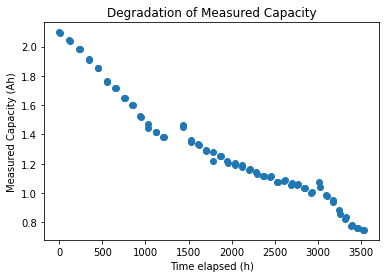

In [48]:
# Show capacity
plt.scatter(df['time'],df['capacity'])
plt.title("Degradation of Measured Capacity")
plt.xlabel("Time elapsed (h)")
plt.ylabel("Measured Capacity (Ah)")
plt.show()